# PACD Assignment 02

- **Nama:** Muhammad Ammar Muflih
- **NIM:** 25/569281/PPA/071167

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from typing import Callable

3


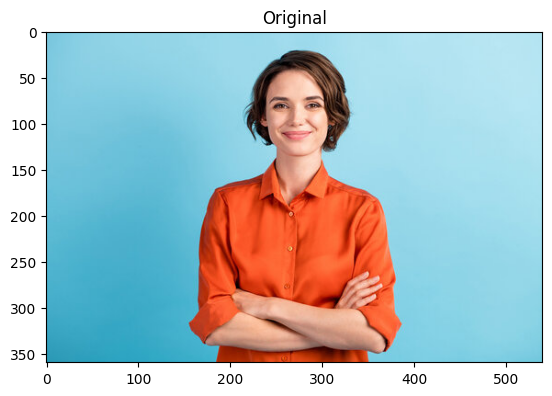

In [2]:
img = Image.open("woman.jpeg")
img = np.array(img)
print(img.shape[2])

img_rgb = []
for i in range(img.shape[2]):
    img_rgb.append(img[:,:,i])

plt.title("Original")
plt.imshow(img)
plt.show()

In [3]:
class ImageFilter:
    def __init__(self, kernel=3, padding=1, stride=1):
        self.kernel = kernel
        self.padding = padding
        self.stride = stride
        pass

    def _apply_filter(self, img, kernel):
        img_padded = np.pad(img, pad_width=self.padding, mode='constant', constant_values=0)
        h, w = img.shape
        output = np.zeros((h, w), dtype=int)

        for i in range(self.padding, h + self.padding):
            for j in range(self.padding, w + self.padding):
                img_mat = img_padded[i-1:i+2, j-1:j+2]
                output[i-self.padding, j-self.padding] = np.sum(img_mat * kernel)

        return output
    
    def mean_blur(self, img):
        kernel = np.ones((self.kernel, self.kernel), dtype=float) / 9
        output = self._apply_filter(img, kernel)
        return output
    
    def sharpening(self, img):
        identity_kernel = np.array([[0, 0, 0],
                                    [0, 2, 0],
                                    [0, 0, 0]])
        mean_kernel = np.ones((self.kernel, self.kernel), dtype=float) / 9
        sharpening_kernel = identity_kernel - mean_kernel
        output = self._apply_filter(img, sharpening_kernel)
        return output
    
    def laplacian_filter(self, img):
        kernel = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]])
        output = self._apply_filter(img, kernel)
        return output
    
    def sobel_filter(self, img):
        kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
        output = self._apply_filter(img, kernel)
        return output
    
    def gaussian_filter(self, img, size=3, sigma=1.0):
        assert size%2 == 1
        ax = np.linspace(-(size//2), size // 2, size)
        xx, yy = np.meshgrid(ax, ax)

        kernel = np.exp(-(xx**2 + yy**2)/(2 * sigma**2))
        kernel = kernel / np.sum(kernel)
        output = self._apply_filter(img, kernel)
        return output


In [4]:
def run(img_rgb, imagefilter: Callable, title: str):
    result_rgb = []
    for i in img_rgb:
        x = imagefilter(i)
        result_rgb.append(x)

    result = np.stack(result_rgb, axis=-1)
    result = np.clip(result, 0, 255).astype(np.uint8)
    
    plt.title(f"{title} Filter")
    plt.imshow(result)
    plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
    plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()

    return result

imageFilter = ImageFilter()

<h1>Blur Filter</h1>

<em>**Blur Filter**</em> atau bisa juga disebut <em>**smoothing filter**</em> dapat digunakan untuk:
<ul>
    <li> Mengurangi noise sederhana.
    <li> Membutuhkan proses yang cepat dan ringan.
    <li> Sebagai <em>pre-process dasar</em>.
</ul>

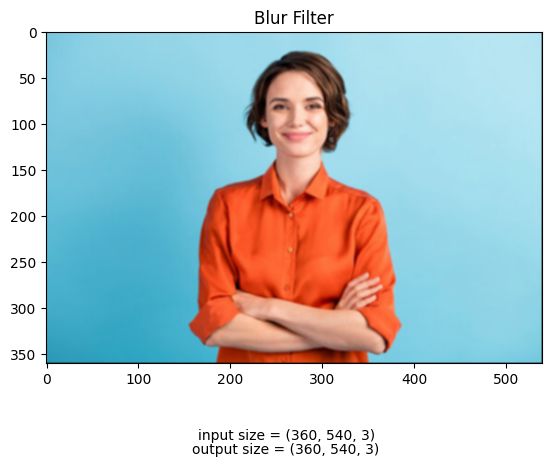

In [5]:
blur_filter = imageFilter.mean_blur
blur_result = run(img_rgb, blur_filter, "Blur")

<h1>Gaussian Filter</h1>

<em>**Gaussian Filter**</em> merupakan salah satu jenis dari <em>**Blur Filter**</em>. <em>**Gaussian Filter**</em> menggunakan distribusi Gaussian untuk hasil blur yang lebih natural. <em>**Gaussian Filter**</em> cocok digunakan untuk:
<ul>
    <li> <em>pre-process dasar</em> untuk <em>Computer Vision</em>.
    <li> Mengurangi noise pada citra dengan distribusi Gaussian.
    <li> Membutuhkan efek blur lebih natural.
    <li> Untuk mengurangi detail sebelum pemrosesan lanjutan.
</ul>

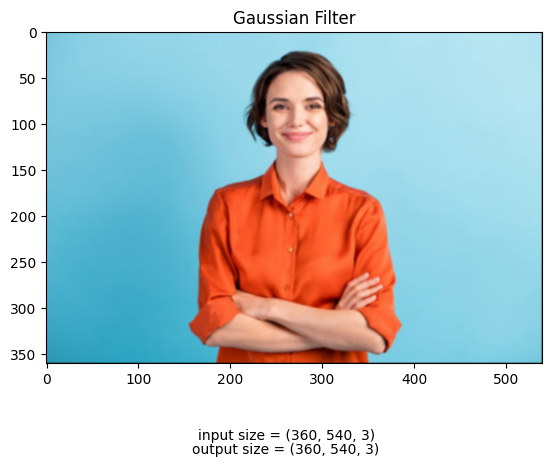

In [6]:
gaussian = imageFilter.gaussian_filter
gaussian_result = run(img_rgb, gaussian, "Gaussian")

<h1>Sharpening Filter</h1>
<em>Sharpening Filter</em> dalam pemrosesan citra digital digunakan untuk menonjolkan detail (<em>edges</em>) dan mempertegas batas antar objek dalam gambar.

berikut adalah beberapa kasus penggunaan <em>Sharpening Filter</em>:
<ul>
    <li> Peningkatan detail tepi.
    <li> Restorasi citra buram.
</ul>

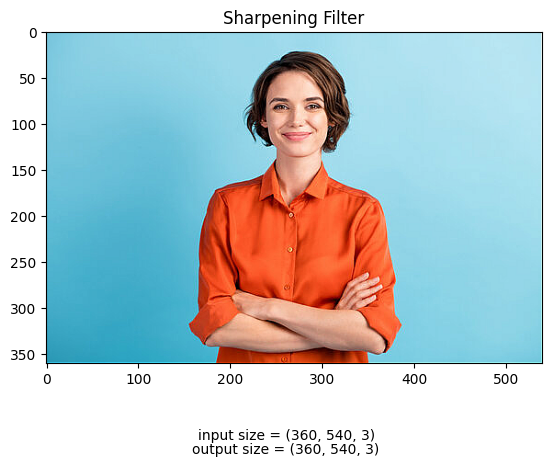

In [7]:
sharpening = imageFilter.sharpening
sharpening_result = run(img_rgb, sharpening, "Sharpening")

<h1>Laplacian Filter</h1>

Penggunaan <em>Laplacian Filter</em> diantaranya adalah:
<ul>
    <li> Deteksi tepi
    <li> Pengenala pola
    <li> Peningkatan detail
</ul>

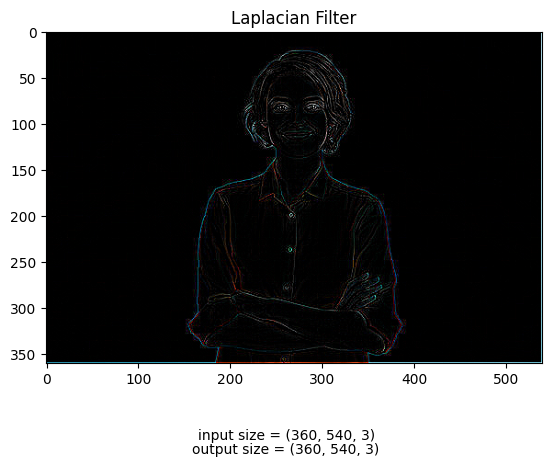

In [8]:
laplacian = imageFilter.laplacian_filter
laplacian_result = run(img_rgb, laplacian, "Laplacian")

<h1>Sobel Filter</h1>

Penggunaan <em>Sobel Filter</em> diantaranya adalah:
<ul>
    <li> Deteksi tepi
</ul>

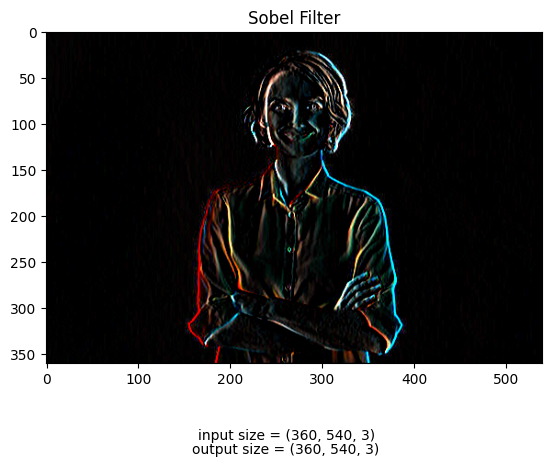

In [9]:
sobel = imageFilter.sobel_filter
sobel_result = run(img_rgb, sobel, "Sobel")

<h1>Sharpening with Bluring Operation</h1>

<h2> 1. Membuat gambar blur (Sebagi Input)</h2>

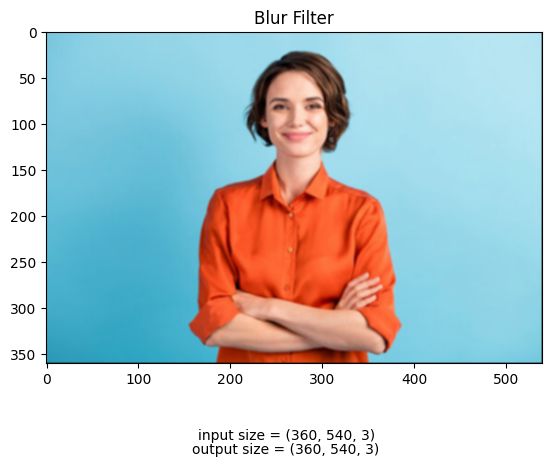

In [34]:
input_image = run(img_rgb, blur_filter, "Blur")

<h2>2. Menambahkan blur pada gambar input</h2>

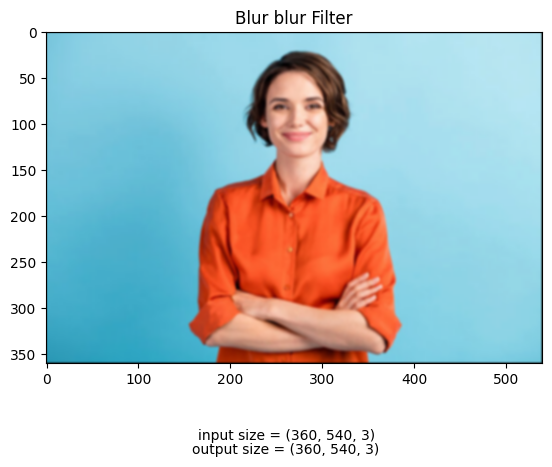

In [35]:
input_float = input_image.astype(np.float32)
input_img_rgb = [input_float[:,:,i] for i in range(input_image.shape[2])]
blur_input_image = run(input_img_rgb, blur_filter, "Blur blur")
blur_float = blur_input_image.astype(np.float32)
blur_input_img_rgb = [blur_float[:,:,i] for i in range(blur_input_image.shape[2])]

## Operasi unsharp masking
**I(sharpened) = I(input) + (I(input) - I(input_blur))**

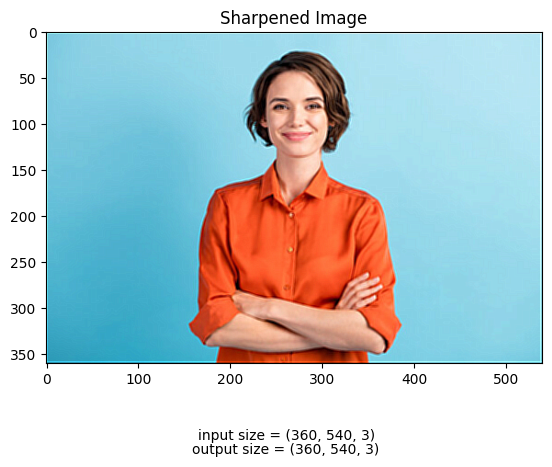

In [40]:
rgb_sharpened = []
alpha = 3
for i in range(3):
    sharpened_channel = input_img_rgb[i] + alpha * (input_img_rgb[i] - blur_input_img_rgb[i])
    rgb_sharpened.append(sharpened_channel)

result = np.stack(rgb_sharpened, axis=-1)
result = np.clip(result, 0, 255).astype(np.uint8)

# Display
plt.title(f"Sharpened Image")
plt.imshow(result)
plt.figtext(0.5, -0.01, f"input size = {img.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.figtext(0.5, -0.04, f"output size = {result.shape}", wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<h2>Kapan Filtering lebih cocok untuk digunakan dibandingkan pixel-based</h2>

<p align="justify">
Filtering lebih cocok digunakan jika dalam memproses citra memperhitungkan nilai piksel tetangga, hal ini dapat dilihat dari penggunaan kernel pada operasi filtering. Beberapa kasus dimana filtering lebih cocok diantaranya adalah ketika citra yang ingin diproses mengandung noise atau jika diperlukan analisis konteks lokal. Dikarenakan pixel-based hanya berbasis individual pixel maka tidak memperhitungkan nilai pixel tetangganya sehingga sensitif terhadap noise namun sederhana, contoh operasi yang menggunakan pixel-based adalah operasi thresholding dan histogram equalization.
</p>
